In [126]:
import csv, os, re
import nltk
import math
from collections import Counter
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, let's list we accomplished in the R file (roughly)

- load bike data, air quality and mt cars as a df
- explore data
    - dimensions
    - column names
    - nas per column
- cleaning data
    - look up python and checking for NA.s
    - count the number of NA.s per column in Air Quality
    - create a column in air quality that replaces NA ozone vals w/ mean of ozone vals
    - create a column that is 5* the temperature column, taking NA's into considerations
    - make an arbitrary "distance" column in bike data and standardize it
    - rename the distance column to be "standardized_dist"
- attach a new column called "ride_cost" (random # bt 0 and 10) (at the end)
- attach an arbitrary "ID" column (at the beginning)
- swap the position of 2 columns
- inspect date columns
    - potentially convert
    - (look up best practice)
    - find the difference in days and then in minutes between 2 arbitrary dates
- filtering data
    - remove rows where ride < 5.00 and Member type is casual
    - only give me back the start and stop stations
- subsetting data
    - split into two halves, along the rows
    - rejoin the two halves, row wise (sql union)
    - join the two halves, column wise (sql join)
- sorting the data
    - sort from most expensive ride_cost to least
    - sort by date taken (descending) and alp. name of station of origin (a-z)
- aggregations
    - count the number of unique station destinations
    - count the number of rides that were `4.00`
    - average ride cost
    - average ride cost per end_station, sorted highest cost to lowest
    - top 5 destinations per day
- correlation 
    - for all possible combos
    - bt wt and mpg
    - return all pairings where x and y have cor of >= .8
- 5 number summary
    - for mpg
    - for ride cost (bikes)
- simple scatter plot for wt and mpg
- regressions
    - linear bt wt and mpg
    - look up logistic regression
- simple string replacement
    - remove all numbers from every element in a list of number-strings like 12345tim13434, 2034983tim0a89
- simple function
    - write a function that outputs the number of unique values in every column of a data frame

In [17]:
sep = "================================"

In [18]:
# series basic
d = {'name' : 'IBM', 'date' : '2010-09-08', 'shares' : 100, 'price' : 10.2}
ds = pd.Series(d)

print(ds[0])

name             IBM
date      2010-09-08
shares           100
price           10.2
dtype: object


In [30]:
# df basic 
e = pd.DataFrame({'name': ['AA', 'IBM'], 'shares': [80, 90]})

print(e)
print(sep)
print(e['name'][0])
print(sep)
print(e.loc[0])
print(sep)
print(e.loc[:,'name'])

  name  shares
0   AA      80
1  IBM      90
AA
name      AA
shares    80
Name: 0, dtype: object
0     AA
1    IBM
Name: name, dtype: object


In [73]:
# read file
mtcars = pd.read_csv('data/mtcars.csv', index_col = None)

# rename that first column.
mtcars.rename(columns = {'Unnamed: 0': 'mnm'}, inplace = True)

print(mtcars.head(1))

print(sep)

# total number of rows
print(len(mtcars))

         mnm   mpg  cyl   disp   hp  drat    wt   qsec  vs  am  gear  carb
0  Mazda RX4  21.0    6  160.0  110   3.9  2.62  16.46   0   1     4     4
32


In [67]:
# data access

# access mpg column
mpg = mtcars['mpg'] # this is identical to mtcars.loc[:, 'mpg']

print(mpg[0])

# access wt and hpt columns
print(mtcars[['wt', 'hp']])

# add an indexed "id" column
# mtcars['id'] = np.arange(len(mtcars))

# access 2nd row, print its hp
row2 = mtcars.loc[1, :]

print(row2['hp'])

21.0
       wt   hp
0   2.620  110
1   2.875  110
2   2.320   93
3   3.215  110
4   3.440  175
5   3.460  105
6   3.570  245
7   3.190   62
8   3.150   95
9   3.440  123
10  3.440  123
11  4.070  180
12  3.730  180
13  3.780  180
14  5.250  205
15  5.424  215
16  5.345  230
17  2.200   66
18  1.615   52
19  1.835   65
20  2.465   97
21  3.520  150
22  3.435  150
23  3.840  245
24  3.845  175
25  1.935   66
26  2.140   91
27  1.513  113
28  3.170  264
29  2.770  175
30  3.570  335
31  2.780  109
110


In [58]:
# filtering
# select rows w/ mpg values less than 20
mtcars[mtcars['mpg'] < 20]
print(sep)
# select row w/ mpg < 20 and hp > 200
mtcars[(mtcars['mpg'] < 20) & (mtcars['hp'] > 200)]

,mnm,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,id
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,6
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,14
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,15
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,16
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4,23
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4,28
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,30


In [76]:
# sorting

# get all cars w/ equal gers and sort them by mnm descending
mtcars[mtcars['gear'] == 3].sort_values('mnm', ascending = False)

,mnm,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


In [104]:
# Null values
# let's work with Air quality

airquality = pd.read_csv("data/airquality.csv", index_col = None)

# first let's get rid of that silly column
airquality.drop('Unnamed: 0', axis = 1, inplace = True)

print(airquality.head(2))
print(sep)
# count the null ozone vals
print(sum(pd.isnull(airquality['Ozone'])))
print(sep)

# make a list of all valid ozone entries
ozone_good = [v for v in airquality['Ozone'] if pd.notnull(v)]

# replace nan w/ '0.0' for the ozone list...
ozone_rep = airquality['Ozone'].fillna(0.0)
print(ozone_rep)

# get every row that contains a nan value anywhere.
airquality_na_df = airquality

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
37
0      41.0
1      36.0
2      12.0
3      18.0
4       0.0
       ... 
148    30.0
149     0.0
150    14.0
151    18.0
152    20.0
Name: Ozone, Length: 153, dtype: float64


In [117]:
# function that returns every row containing a nan. handy!
def nans(df): return df[df.isnull().any(axis=1)]

# function that counts the number of nan's per column. returns as dict!
def column_null_counter(nans_df):
    d = {}
    
    for c in nans_df.columns:
        d[c] = len([v for v in nans_df[c] if pd.isnull(v)])
    
    return d

nulls = nans(airquality)

nulls.head()

results = column_null_counter(nulls)

print(results)

{'Ozone': 37, 'Solar.R': 7, 'Wind': 0, 'Temp': 0, 'Month': 0, 'Day': 0}


In [125]:
# in-depth with strings...
# find every car that has a p in its name
mtcars[mtcars['mnm'].str.lower().str.contains("p")]

# use a regular expression to find cars whose mnm is 3 units
# e.g. "toyota corrola s"
mtcars[mtcars['mnm'].str.lower().str.match('[a-z]+\s[a-z]+\s[a-z]+')]

,mnm,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.17,14.5,0,1,5,4


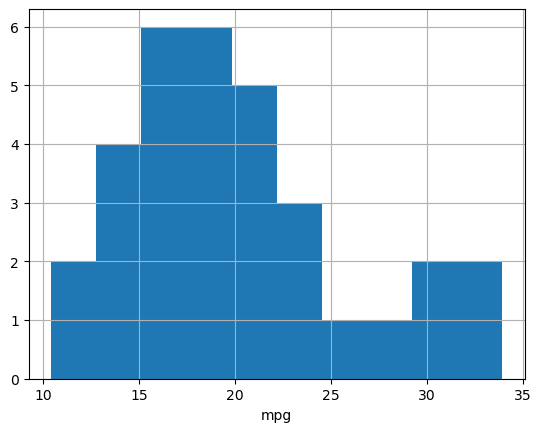

In [131]:
# basic plot
# plot mtcars mpg as a histogram
mtcars.mpg.hist()
plt.xlabel("mpg");
plt.show()

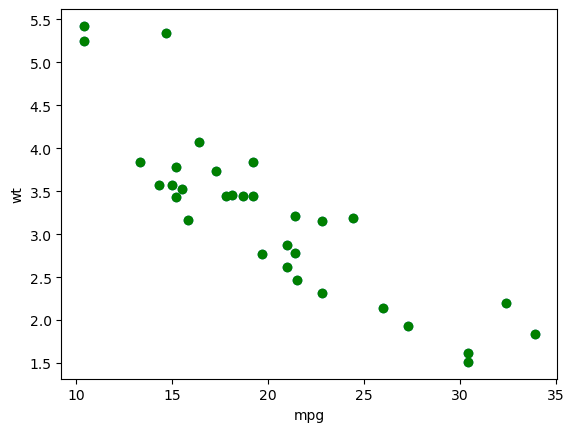

In [133]:
# plot mtcars mpg vs weight as scatter plot
plt.scatter(mtcars.mpg, mtcars.wt, c="g")
plt.xlabel("mpg")
plt.ylabel("wt")
plt.show()

In [ ]:
# aggregation and group by

bike_data = pd.read_csv("data/2017Q1-capitalbikeshare-tripdata.csv", index_col = None)

print(bike_data.columns)

print(sep)

# the number of casual riders
print(bike_data.groupby(['Member type']).size()['Casual'])

# group by start_date and start_station

b_agg = pd.DataFrame(bike_data.groupby(['Start date', 'Start station']))
b_agg.to_frame()

b_agg.head()